In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
sb.set()
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
import sys
!{sys.executable} -m pip install missingpy
from sklearn.impute import KNNImputer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
import sklearn.neighbors._base
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
from missingpy import MissForest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

## Import Dataset

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
IndependentVariables = ["age","BMI","heart rate", "Systolic blood pressure", "Diastolic blood pressure", "Respiratory rate","temperature","SP O2","Urine output","hematocrit","RBC","MCH","MCHC","MCV","RDW","Leucocyte","Platelets",\
                             "Neutrophils","Basophils","Lymphocyte" ,"PT","INR","NT-proBNP","Creatine kinase","Creatinine","Urea nitrogen","glucose","Blood potassium","Blood sodium","Blood calcium","Chloride","Anion gap",\
                              "Magnesium ion","PH","Bicarbonate","Lactic acid","PCO2","EF"]
DependentVariables = ["hypertensive","atrialfibrillation","CHD with no MI","diabetes","deficiencyanemias","depression","Hyperlipemia","Renal failure","COPD"]

In [4]:
#split the data from our train and test data set to the x and y values for machine learning
X_train = train[IndependentVariables]
y_train1 = train['hypertensive']
y_train2 = train['atrialfibrillation']
y_train3 = train['CHD with no MI']
y_train4 = train['diabetes']
y_train5 = train['deficiencyanemias']
y_train6 = train['depression']
y_train7 = train['Hyperlipemia']
y_train8 = train['Renal failure']
y_train9 = train['COPD']
X_test = test[IndependentVariables]
y_test1 = test['hypertensive']
y_test2 = test['atrialfibrillation']
y_test3 = test['CHD with no MI']
y_test4 = test['diabetes']
y_test5 = test['deficiencyanemias']
y_test6 = test['depression']
y_test7 = test['Hyperlipemia']
y_test8 = test['Renal failure']
y_test9 = test['COPD']

## Model Functions

### RandomForest

In [5]:
def RandomForestLin(X_train, X_test,y_train, y_test):
    
    
    
    param_grid = {'n_estimators': np.arange(100,1001,100),  
                  'max_depth': np.arange(2, 11)}             

   
    hpGrid = GridSearchCV(RandomForestClassifier(),  
                          param_grid,                 
                          cv = 5,                     
                          scoring = 'accuracy')       
   
    hpGrid.fit(X_train, y_train.ravel())
    
   
    print(hpGrid.best_estimator_)

   
    print(np.abs(hpGrid.best_score_))
    
    bestdic = hpGrid.best_params_
    a= bestdic['max_depth']
    b= bestdic['n_estimators']
    
   
    rforest = RandomForestClassifier(n_estimators = b,  
                                 max_depth = a)       

    
    rforest.fit(X_train, y_train)
    
    
    y_train_pred = rforest.predict(X_train)
    y_test_pred = rforest.predict(X_test)

    
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Classification Accuracy \t:", rforest.score(X_train, y_train))
    print()

    
    print("Goodness of Fit of Model \tTest Dataset")
    print("Classification Accuracy \t:", rforest.score(X_test, y_test))
    print()

    
    f, axes = plt.subplots(1, 2, figsize=(12, 4))
    sb.heatmap(confusion_matrix(y_train, y_train_pred),
               annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
    sb.heatmap(confusion_matrix(y_test, y_test_pred), 
               annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
        
    cm = confusion_matrix(y_train,y_train_pred)
    TN = cm[0][0]
    FN = cm[1][0]
    TP = cm[1][1]
    FP = cm[0][1]

    ClassificationAccuracyTrain = (TP+TN)/(TP+FP+FN+TN)
    TruePositiveRateTrain = TP/(FN+TP)
    FalsePositiveRateTrain = FP/(TN+FP)
    FalseNegativeRateTrain = FN/(FN+TP)
    TrueNegativeRateTrain = TN/(TN+FP)

    cm = confusion_matrix(y_test,y_test_pred)
    TN = cm[0][0]
    FN = cm[1][0]
    TP = cm[1][1]
    FP = cm[0][1]

    ClassificationAccuracyTest = (TP+TN)/(TP+FP+FN+TN)
    TruePositiveRateTest = TP/(FN+TP)
    FalsePositiveRateTest = FP/(TN+FP)
    FalseNegativeRateTest = FN/(FN+TP)
    TrueNegativeRateTest = TN/(TN+FP)

    print("TruePositiveRateTrain \t:", TruePositiveRateTrain)
    print("FalsePositiveRateTrain \t:", FalsePositiveRateTrain)
    print("TrueNegativeRateTrain \t:", TrueNegativeRateTrain)
    print("FalseNegativeRateTrain \t:", FalseNegativeRateTrain)
    print()

    print("TruePositiveRateTest \t:", TruePositiveRateTest)
    print("FalsePositiveRateTest \t:", FalsePositiveRateTest)
    print("TrueNegativeRateTest \t:", TrueNegativeRateTest)
    print("FalseNegativeRateTest \t:", FalseNegativeRateTest)
    print()

### Logistic Regression

In [6]:
def Logitech(X_train, X_test,y_train, y_test):
    logreg = LogisticRegression(solver='lbfgs', max_iter=10000)
    logreg.fit(X_train,y_train.values.ravel())
    
    y_train_pred=logreg.predict(X_train)
    y_test_pred=logreg.predict(X_test)


    print("Goodness of Fit of Model \tTrain Dataset")
    print("Classification Accuracy \t:", logreg.score(X_train, y_train))
    print()


    print("Goodness of Fit of Model \tTest Dataset")
    print("Classification Accuracy \t:", logreg.score(X_test, y_test))
    print()


    f, axes = plt.subplots(1, 2, figsize=(12, 4))
    sb.heatmap(confusion_matrix(y_train, y_train_pred),
               annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
    sb.heatmap(confusion_matrix(y_test, y_test_pred), 
               annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
    
    cm = confusion_matrix(y_train,y_train_pred)
    TN = cm[0][0]
    FN = cm[1][0]
    TP = cm[1][1]
    FP = cm[0][1]

    ClassificationAccuracyTrain = (TP+TN)/(TP+FP+FN+TN)
    TruePositiveRateTrain = TP/(FN+TP)
    FalsePositiveRateTrain = FP/(TN+FP)
    FalseNegativeRateTrain = FN/(FN+TP)
    TrueNegativeRateTrain = TN/(TN+FP)

    cm = confusion_matrix(y_test,y_test_pred)
    TN = cm[0][0]
    FN = cm[1][0]
    TP = cm[1][1]
    FP = cm[0][1]

    ClassificationAccuracyTest = (TP+TN)/(TP+FP+FN+TN)
    TruePositiveRateTest = TP/(FN+TP)
    FalsePositiveRateTest = FP/(TN+FP)
    FalseNegativeRateTest = FN/(FN+TP)
    TrueNegativeRateTest = TN/(TN+FP)

    print("TruePositiveRateTrain \t:", TruePositiveRateTrain)
    print("FalsePositiveRateTrain \t:", FalsePositiveRateTrain)
    print("TrueNegativeRateTrain \t:", TrueNegativeRateTrain)
    print("FalseNegativeRateTrain \t:", FalseNegativeRateTrain)
    print()

    print("TruePositiveRateTest \t:", TruePositiveRateTest)
    print("FalsePositiveRateTest \t:", FalsePositiveRateTest)
    print("TrueNegativeRateTest \t:", TrueNegativeRateTest)
    print("FalseNegativeRateTest \t:", FalseNegativeRateTest)
    print()

### Decision Tree

In [7]:
def DecisionTreeEpic(X_train, X_test,y_train, y_test):
        param_dict = {"max_depth":np.arange(2,11)}
        hpGrid = GridSearchCV(DecisionTreeClassifier(),  
                          param_dict,                 
                          cv = 5,                     
                          scoring = 'accuracy')   
        hpGrid.fit(X_train, y_train.ravel())
        bestdic = hpGrid.best_params_
        a= bestdic['max_depth']

        dectree = DecisionTreeClassifier(max_depth = 10)
        dectree.fit(X_train, y_train)
        f = plt.figure(figsize=(48,48))
        plot_tree(dectree, filled=True, rounded=True, 
                  feature_names=X_train.columns, 
                  class_names=["No","Yes"])
 
        y_train_pred = dectree.predict(X_train)
        y_test_pred = dectree.predict(X_test)

        
        print("Goodness of Fit of Model \tTrain Dataset")
        print("Classification Accuracy \t:", dectree.score(X_train, y_train))
        print()


        print("Goodness of Fit of Model \tTest Dataset")
        print("Classification Accuracy \t:", dectree.score(X_test, y_test))
        print()


        f, axes = plt.subplots(1, 2, figsize=(12, 4))
        sb.heatmap(confusion_matrix(y_train, y_train_pred),
                   annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
        sb.heatmap(confusion_matrix(y_test, y_test_pred), 
                   annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
    
        cm = confusion_matrix(y_train,y_train_pred)
        TN = cm[0][0]
        FN = cm[1][0]
        TP = cm[1][1]
        FP = cm[0][1]

        ClassificationAccuracyTrain = (TP+TN)/(TP+FP+FN+TN)
        TruePositiveRateTrain = TP/(FN+TP)
        FalsePositiveRateTrain = FP/(TN+FP)
        FalseNegativeRateTrain = FN/(FN+TP)
        TrueNegativeRateTrain = TN/(TN+FP)

        cm = confusion_matrix(y_test,y_test_pred)
        TN = cm[0][0]
        FN = cm[1][0]
        TP = cm[1][1]
        FP = cm[0][1]

        ClassificationAccuracyTest = (TP+TN)/(TP+FP+FN+TN)
        TruePositiveRateTest = TP/(FN+TP)
        FalsePositiveRateTest = FP/(TN+FP)
        FalseNegativeRateTest = FN/(FN+TP)
        TrueNegativeRateTest = TN/(TN+FP)

        print("TruePositiveRateTrain \t:", TruePositiveRateTrain)
        print("FalsePositiveRateTrain \t:", FalsePositiveRateTrain)
        print("TrueNegativeRateTrain \t:", TrueNegativeRateTrain)
        print("FalseNegativeRateTrain \t:", FalseNegativeRateTrain)
        print()

        print("TruePositiveRateTest \t:", TruePositiveRateTest)
        print("FalsePositiveRateTest \t:", FalsePositiveRateTest)
        print("TrueNegativeRateTest \t:", TrueNegativeRateTest)
        print("FalseNegativeRateTest \t:", FalseNegativeRateTest)
        print()

# Resample

We decided to resample CHD with no MI to balance the yes and no data to see if it gives a more accurate model

In [8]:
medicalCHD0 = train[train["CHD with no MI"] == 0]
medicalCHD1 = train[train["CHD with no MI"] == 1]
 

medicalCHD1_up = resample(medicalCHD1,replace=True,n_samples=medicalCHD0.shape[0])    
 

medicalCHD_up = pd.concat([medicalCHD0, medicalCHD1_up])
 

medicalCHD_up["CHD with no MI"].value_counts()

0.0    859
1.0    859
Name: CHD with no MI, dtype: int64

In [9]:
medicalCHD_up.shape

(1718, 51)

In [10]:
y_trainCHDup = medicalCHD_up["CHD with no MI"]
X_trainCHDup = pd.DataFrame(medicalCHD_up[["age","BMI","heart rate", "Systolic blood pressure", "Diastolic blood pressure", "Respiratory rate","temperature","SP O2","Urine output","hematocrit","RBC","MCH","MCHC","MCV","RDW","Leucocyte","Platelets",\
                             "Neutrophils","Basophils","Lymphocyte" ,"PT","INR","NT-proBNP","Creatine kinase","Creatinine","Urea nitrogen","glucose","Blood potassium","Blood sodium","Blood calcium","Chloride","Anion gap",\
                              "Magnesium ion","PH","Bicarbonate","Lactic acid","PCO2","EF"]])

### Random Forest

RandomForestClassifier(max_depth=10, n_estimators=200)
0.985449861007526
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9930151338766007

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8686440677966102

TruePositiveRateTrain 	: 1.0
FalsePositiveRateTrain 	: 0.013969732246798603
TrueNegativeRateTrain 	: 0.9860302677532014
FalseNegativeRateTrain 	: 0.0

TruePositiveRateTest 	: 0.15789473684210525
FalsePositiveRateTest 	: 0.06912442396313365
TrueNegativeRateTest 	: 0.9308755760368663
FalseNegativeRateTest 	: 0.8421052631578947



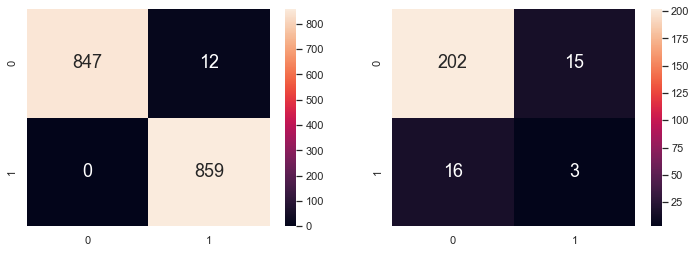

In [11]:
RandomForestLin(X_trainCHDup, X_test,y_trainCHDup, y_test3)

Analysis:
    
    Better results than before resampling but False Negative Rate is still pretty high
    Maybe because the test data set is also imbalanced

## We try other machine learning model to check if result becomes better

### Logistic Regression on CHD with no MI

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6775320139697323

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6779661016949152

TruePositiveRateTrain 	: 0.6623981373690337
FalsePositiveRateTrain 	: 0.3073341094295693
TrueNegativeRateTrain 	: 0.6926658905704307
FalseNegativeRateTrain 	: 0.33760186263096625

TruePositiveRateTest 	: 0.631578947368421
FalsePositiveRateTest 	: 0.31797235023041476
TrueNegativeRateTest 	: 0.6820276497695853
FalseNegativeRateTest 	: 0.3684210526315789



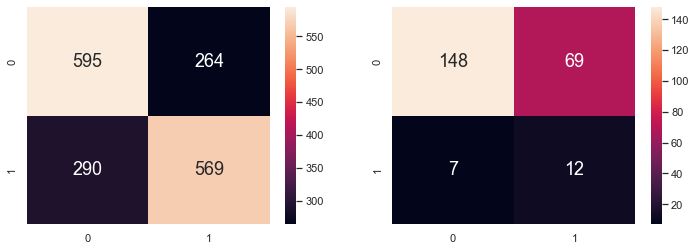

In [12]:
Logitech(X_trainCHDup, X_test,y_trainCHDup, y_test3)

Analysis:

    Logistic Regression produce a much better result than randomforest for CHD with no MI

### Decision Tree for CHD with no MI

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9377182770663562

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7838983050847458

TruePositiveRateTrain 	: 1.0
FalsePositiveRateTrain 	: 0.12456344586728754
TrueNegativeRateTrain 	: 0.8754365541327125
FalseNegativeRateTrain 	: 0.0

TruePositiveRateTest 	: 0.3157894736842105
FalsePositiveRateTest 	: 0.17511520737327188
TrueNegativeRateTest 	: 0.8248847926267281
FalseNegativeRateTest 	: 0.6842105263157895



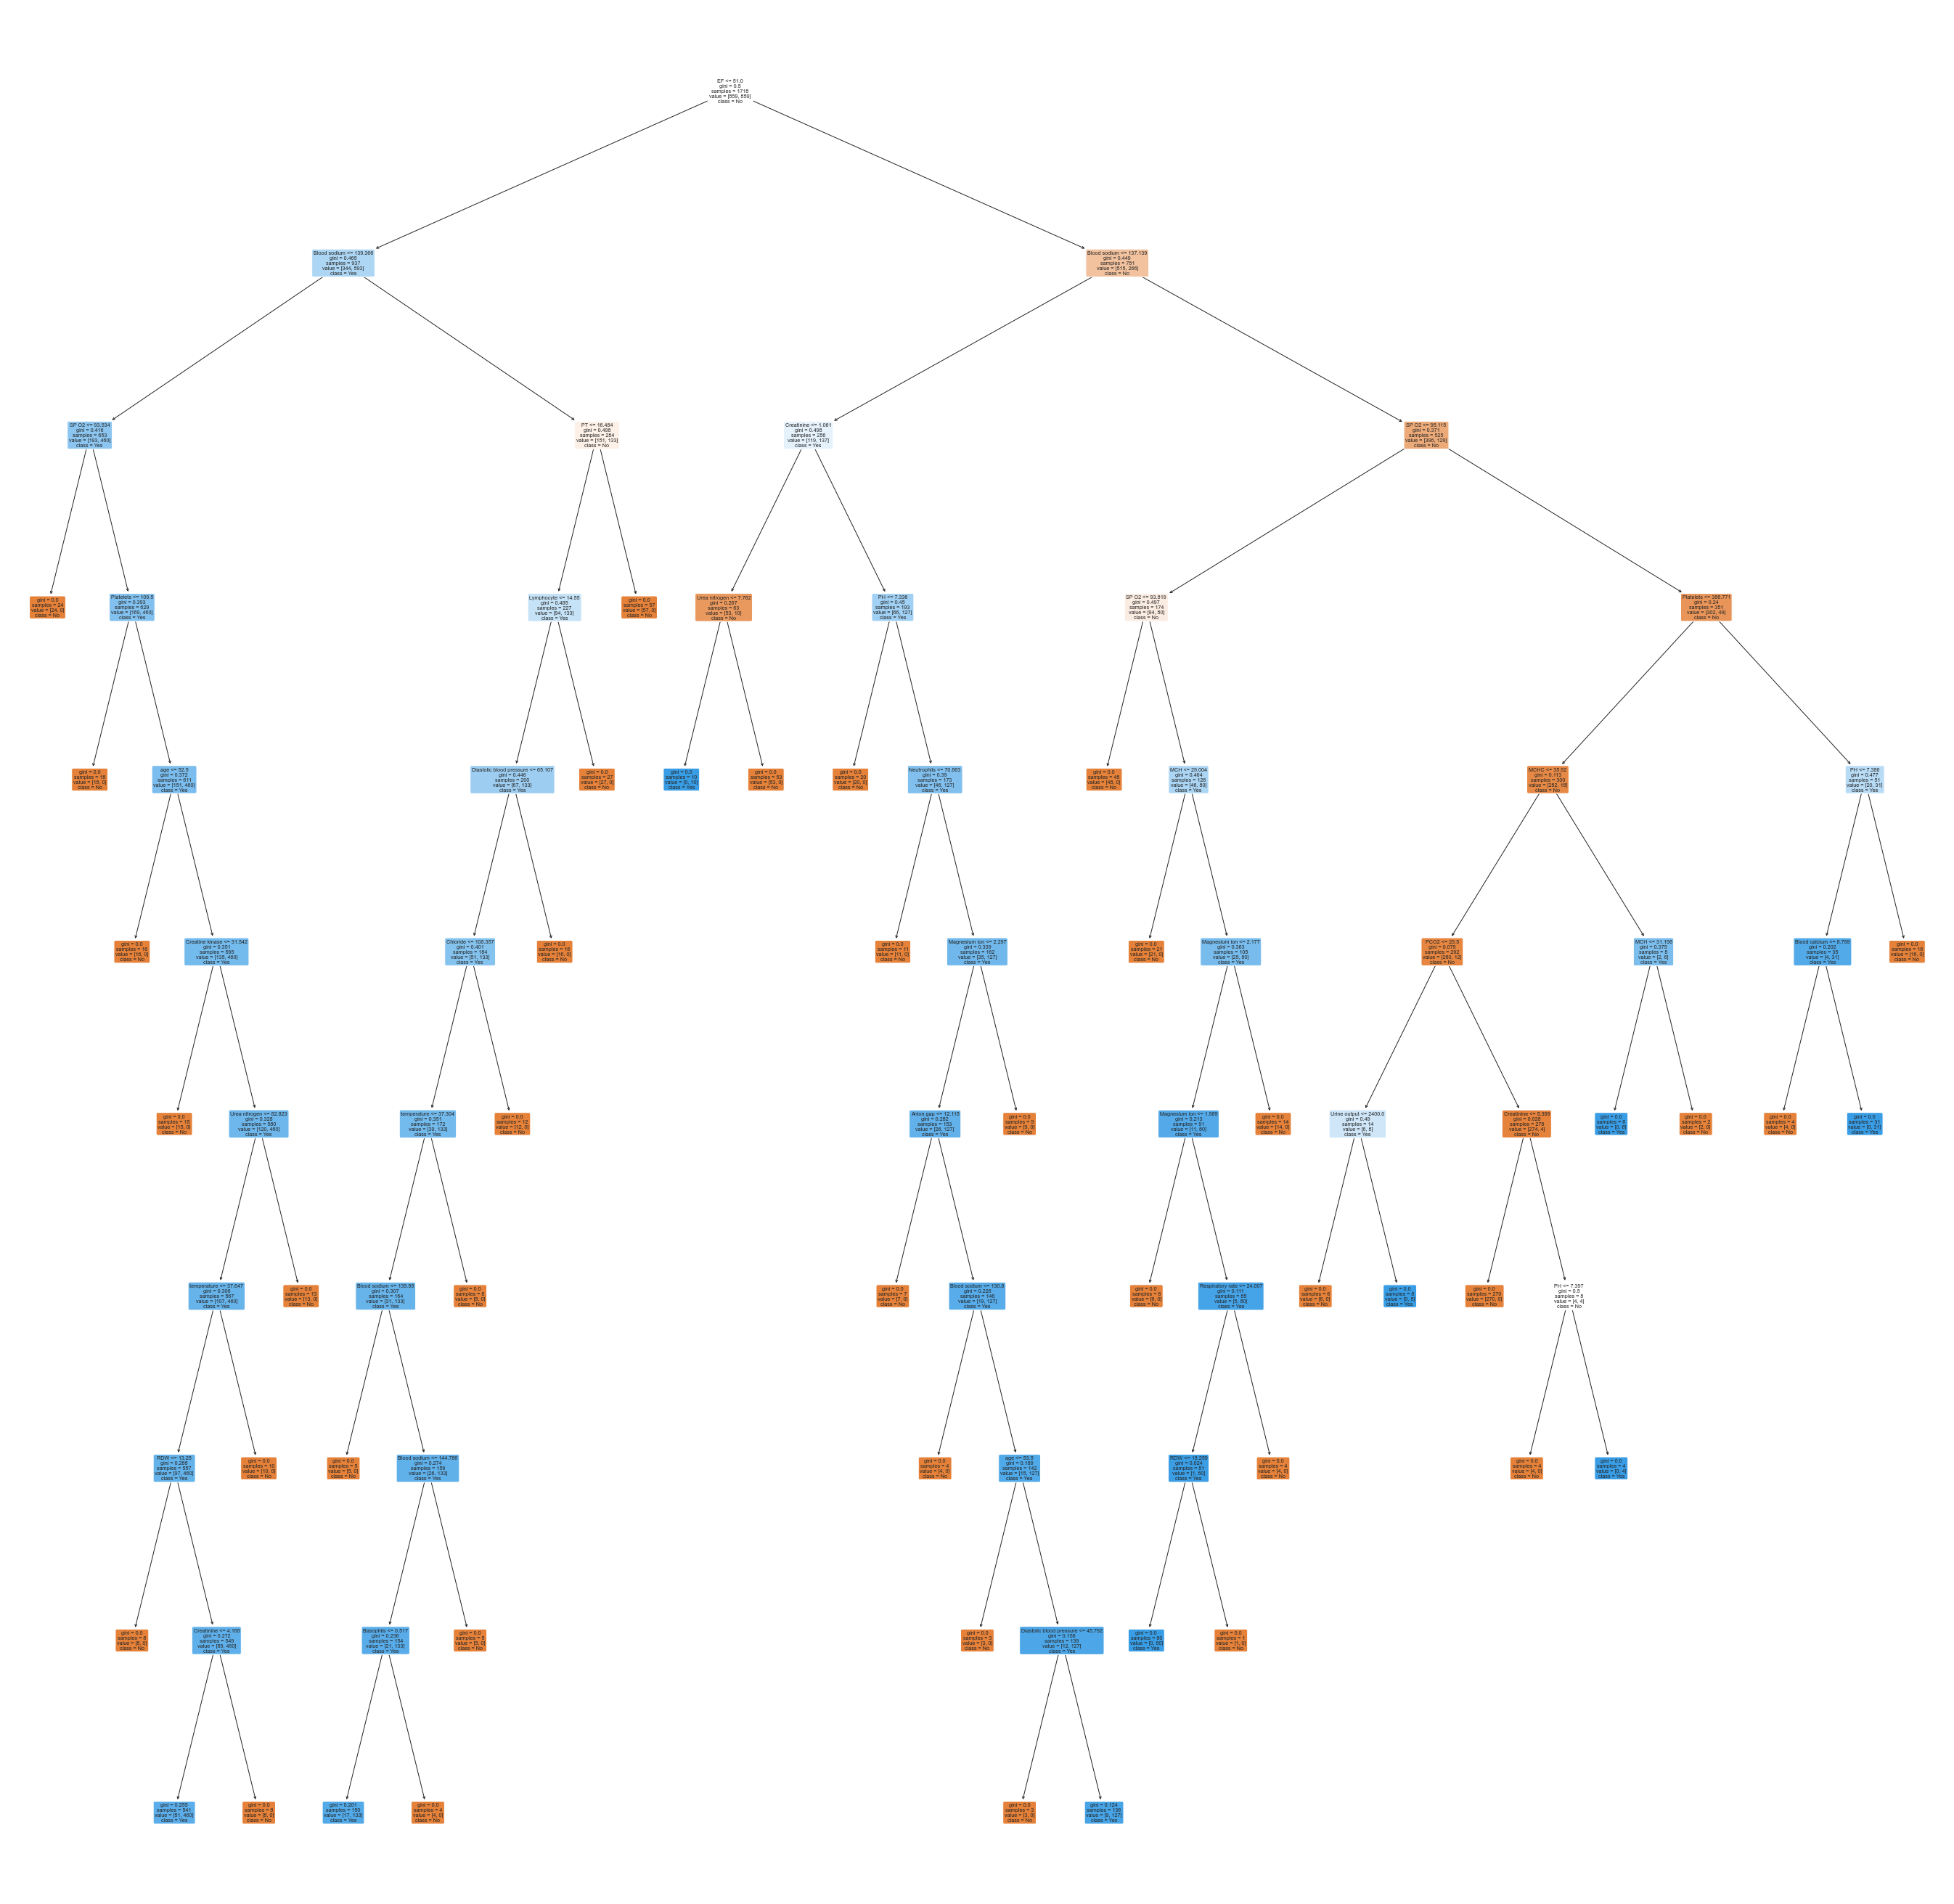

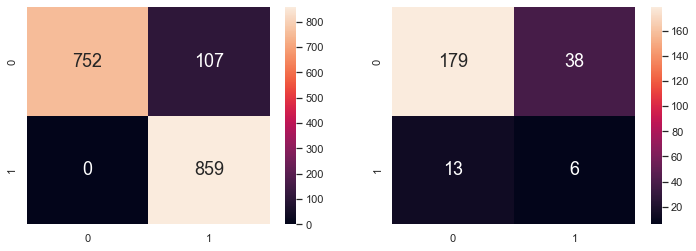

In [13]:
DecisionTreeEpic(X_trainCHDup, X_test,y_trainCHDup, y_test3)

Analysis:

    Slightly better results than RandomForest, maybe because RandomForest with GridSearch overfit a little.
    However, it still loses to Logistic Regression Model

## Feature importances
    We use feature importance to see which variables are more important in determing the diseases in the Logistic Regression 
    Model

/Users/laulinghin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(0.5, 0, 'Logistic Regression Feature Importance')

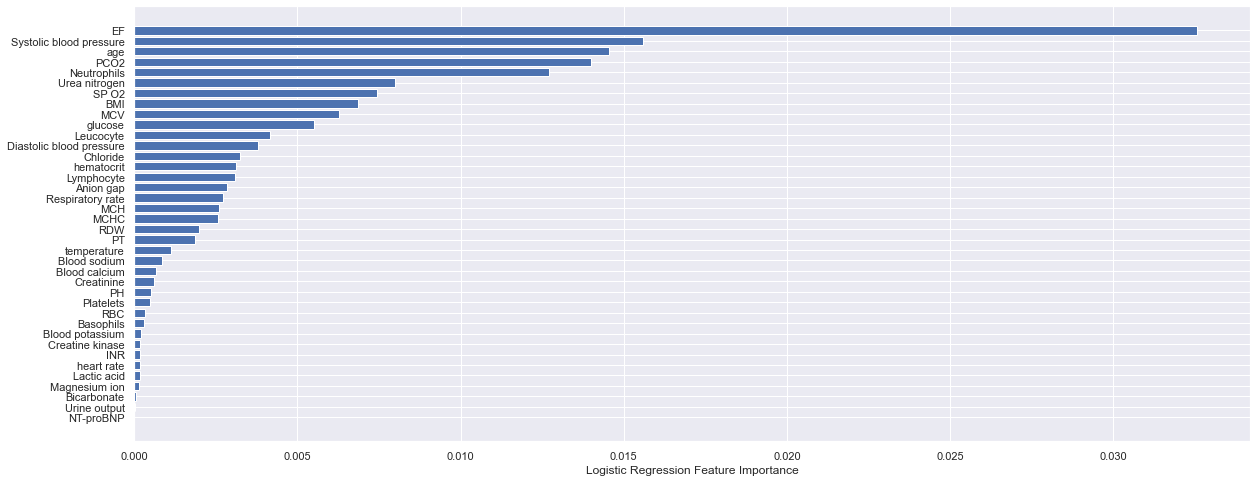

In [14]:
plt.rcParams.update({'figure.figsize': (20.0, 8.0)})
plt.rcParams.update({'font.size': 14})
model = LogisticRegression()
model.fit(X_trainCHDup, y_trainCHDup)
importance = abs(model.coef_[0])
#absolute value to better see the scale of the correlation values
sorted_idx = importance.argsort()
plt.barh(X_trainCHDup.columns[sorted_idx], importance[sorted_idx])
plt.xlabel("Logistic Regression Feature Importance")

Analysis:

    Top 5 variables are:
        EF,age,Neutrophilis,Systolic blood pressure and PCO2

## Resample Renal failure data and check if it produces better results

In [15]:
medicalRenal0 = train[train["Renal failure"] == 0]
medicalRenal1 = train[train["Renal failure"] == 1]
 

medicalRenal1_up = resample(medicalRenal1, 
                        replace=True,                     
                        n_samples=medicalRenal0.shape[0])   
 

medicalRenal_up = pd.concat([medicalRenal0, medicalRenal1_up])
 

medicalRenal_up["Renal failure"].value_counts()

0.0    594
1.0    594
Name: Renal failure, dtype: int64

In [16]:
medicalRenal_up.shape

(1188, 51)

In [17]:
y_trainRenalup = medicalRenal_up["Renal failure"]
X_trainRenalup = pd.DataFrame(medicalRenal_up[["age","BMI","heart rate", "Systolic blood pressure", "Diastolic blood pressure", "Respiratory rate","temperature","SP O2","Urine output","hematocrit","RBC","MCH","MCHC","MCV","RDW","Leucocyte","Platelets",\
                             "Neutrophils","Basophils","Lymphocyte" ,"PT","INR","NT-proBNP","Creatine kinase","Creatinine","Urea nitrogen","glucose","Blood potassium","Blood sodium","Blood calcium","Chloride","Anion gap",\
                              "Magnesium ion","PH","Bicarbonate","Lactic acid","PCO2","EF"]])

### RandomForest on Upsampled Renal Failure

RandomForestClassifier(max_depth=10, n_estimators=1000)
0.889710314505549
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9932659932659933

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7796610169491526

TruePositiveRateTrain 	: 1.0
FalsePositiveRateTrain 	: 0.013468013468013467
TrueNegativeRateTrain 	: 0.9865319865319865
FalseNegativeRateTrain 	: 0.0

TruePositiveRateTest 	: 0.7108433734939759
FalsePositiveRateTest 	: 0.1830065359477124
TrueNegativeRateTest 	: 0.8169934640522876
FalseNegativeRateTest 	: 0.2891566265060241



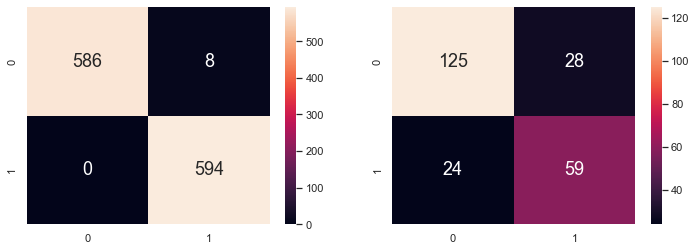

In [18]:
RandomForestLin(X_trainRenalup, X_test,y_trainRenalup, y_test8)

### Logistic Regression on Upsampled Renal Failure

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7954545454545454

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7542372881355932

TruePositiveRateTrain 	: 0.7676767676767676
FalsePositiveRateTrain 	: 0.17676767676767677
TrueNegativeRateTrain 	: 0.8232323232323232
FalseNegativeRateTrain 	: 0.23232323232323232

TruePositiveRateTest 	: 0.6987951807228916
FalsePositiveRateTest 	: 0.21568627450980393
TrueNegativeRateTest 	: 0.7843137254901961
FalseNegativeRateTest 	: 0.30120481927710846



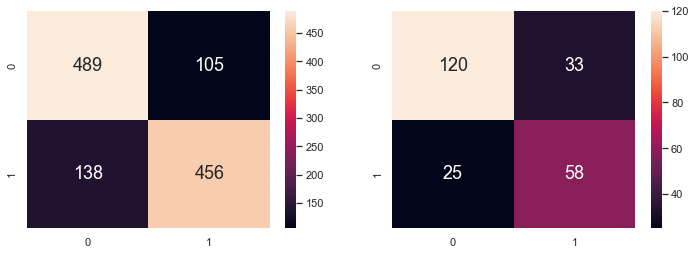

In [19]:
Logitech(X_trainRenalup, X_test,y_trainRenalup, y_test8)

### Decision Tree on Upsampled Renal Failure

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9856902356902357

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.75

TruePositiveRateTrain 	: 0.9966329966329966
FalsePositiveRateTrain 	: 0.025252525252525252
TrueNegativeRateTrain 	: 0.9747474747474747
FalseNegativeRateTrain 	: 0.003367003367003367

TruePositiveRateTest 	: 0.6987951807228916
FalsePositiveRateTest 	: 0.2222222222222222
TrueNegativeRateTest 	: 0.7777777777777778
FalseNegativeRateTest 	: 0.30120481927710846



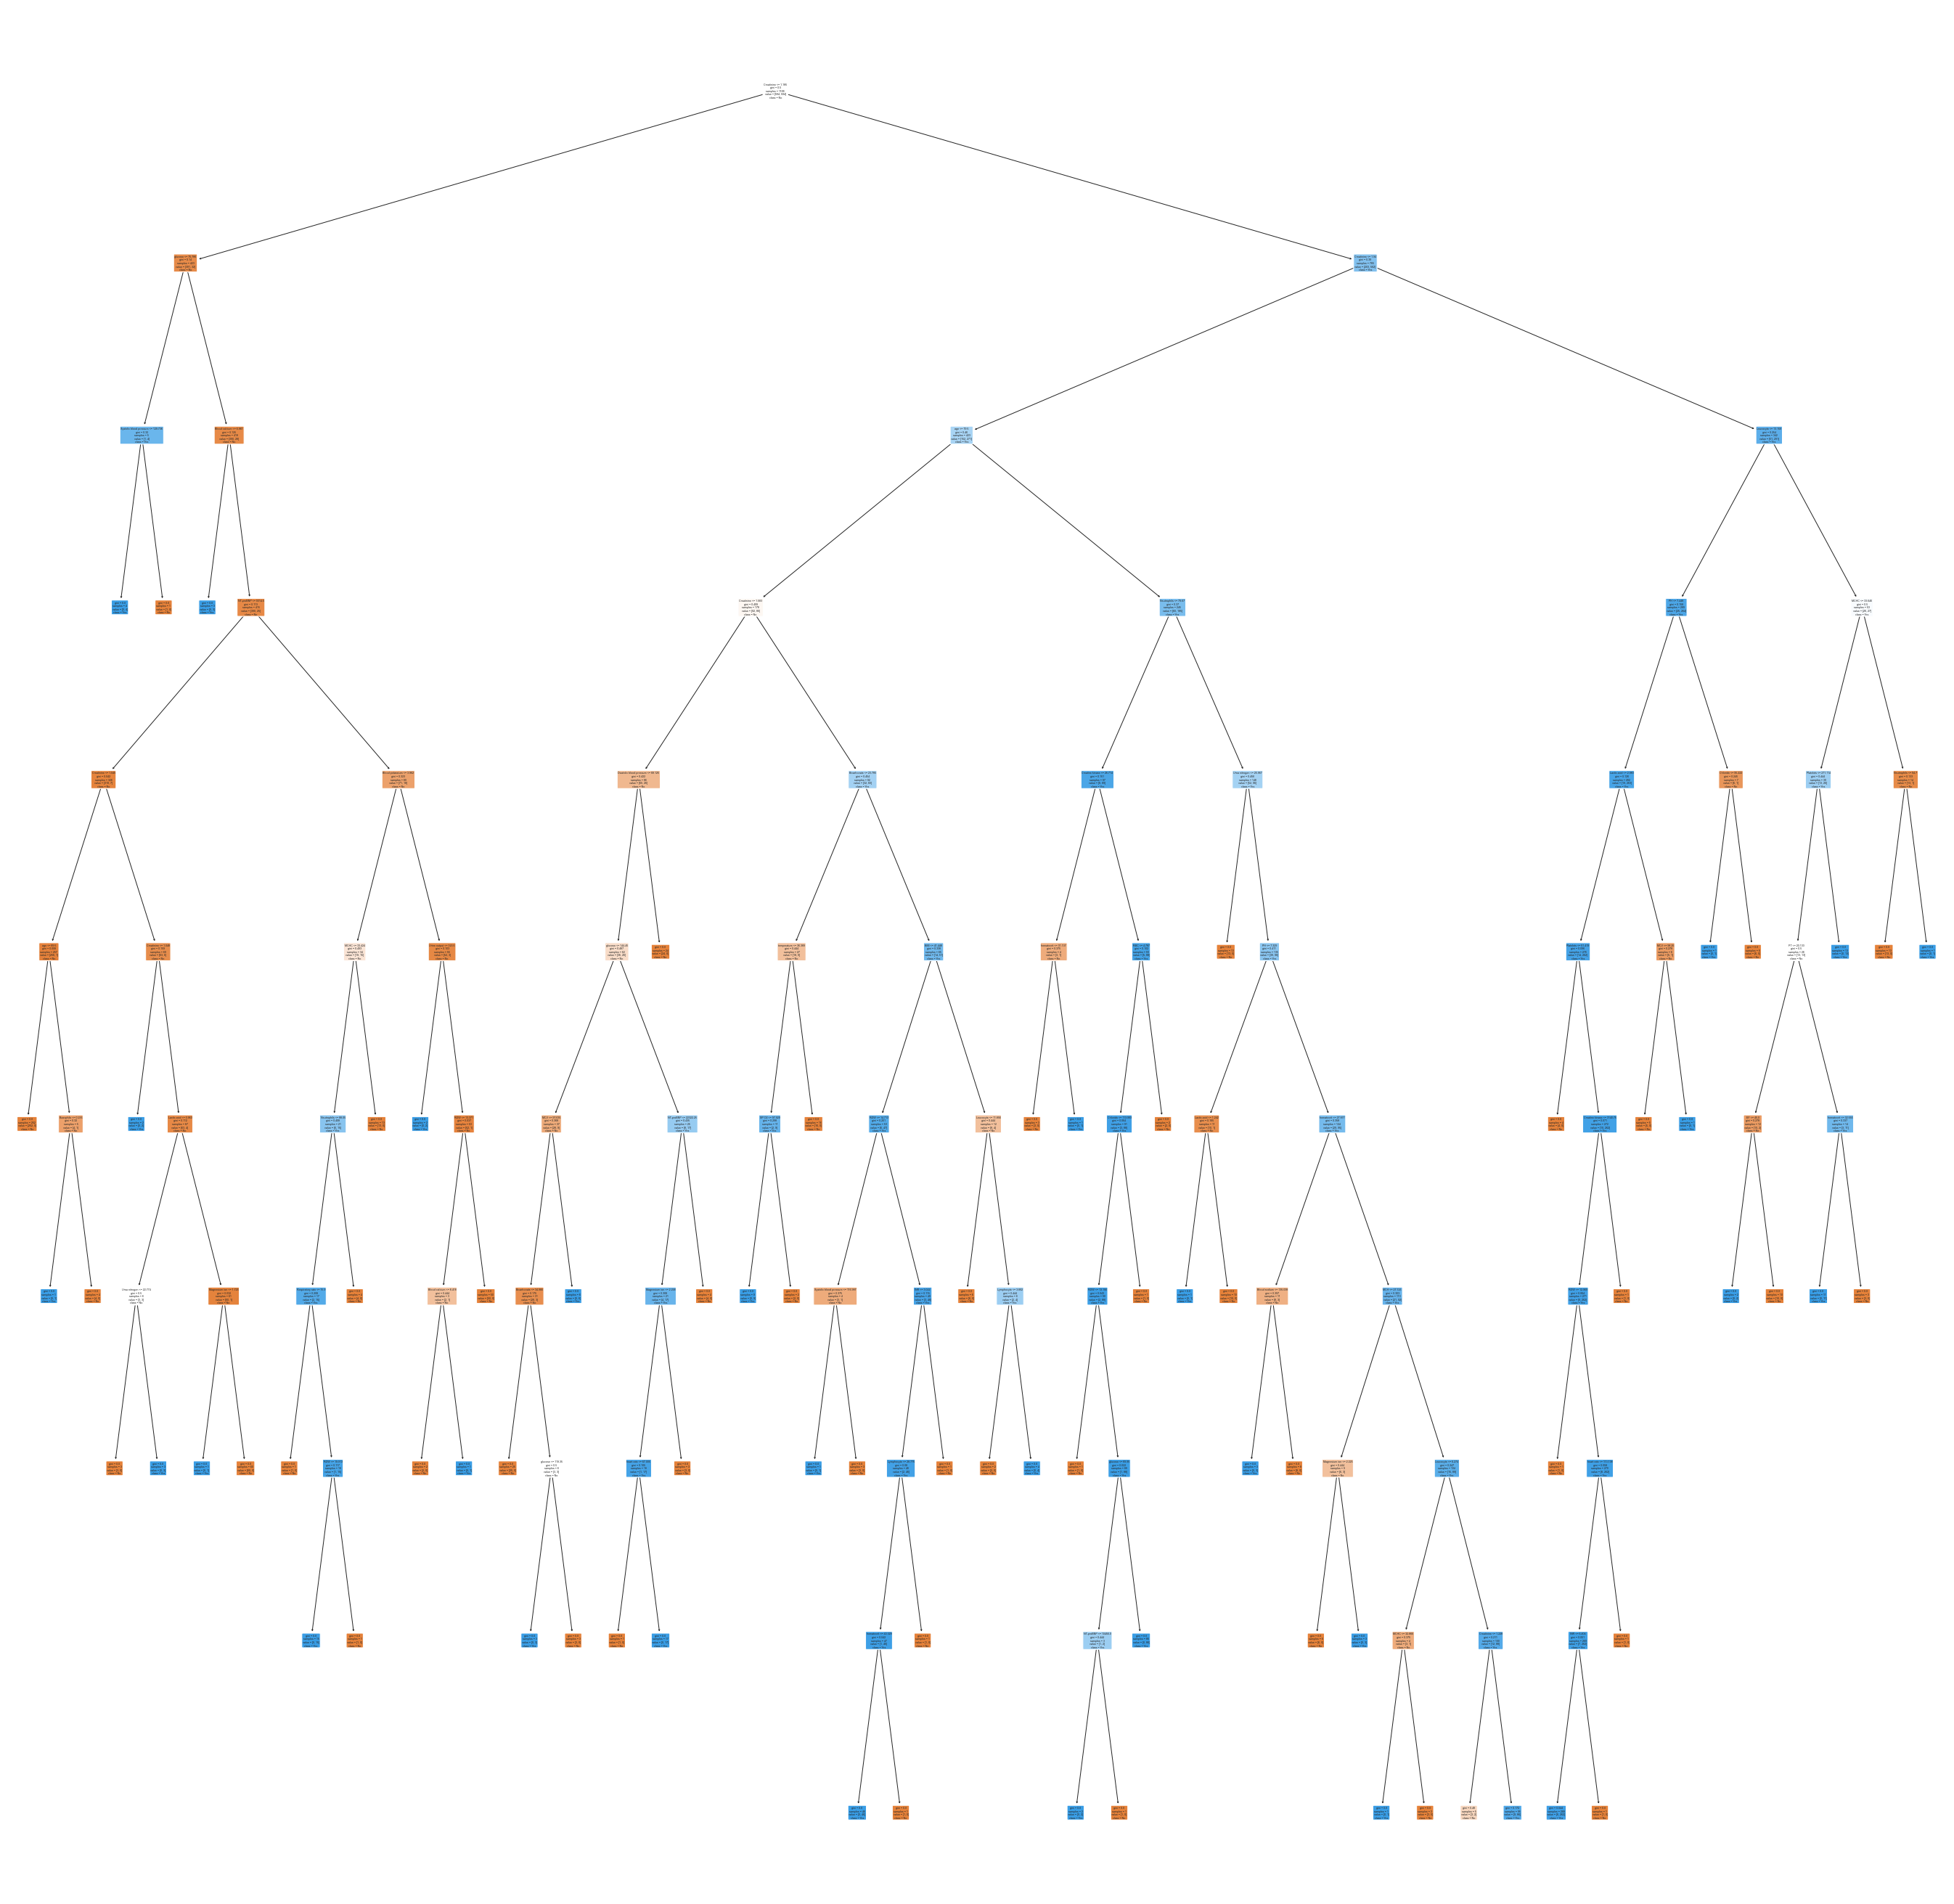

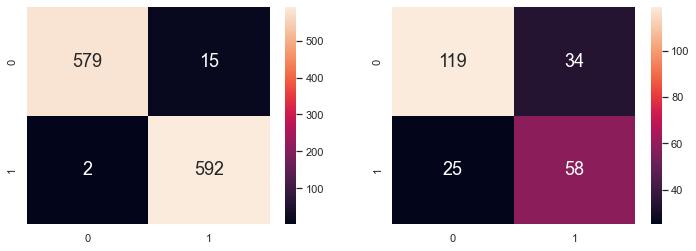

In [20]:
DecisionTreeEpic(X_trainRenalup, X_test,y_trainRenalup, y_test8)

Analysis:
    
    It turns out for Renal failure, RandomForest is still the most accurate machine learning model to predict the disease from
    the variables
    Resampling does not really improve the model as the results remains similar

## Feature importances
    We use feature importance to see which variables are more important in determing the diseases in the RandomForest Model

Text(0.5, 0, 'Random Forest Feature Importance')

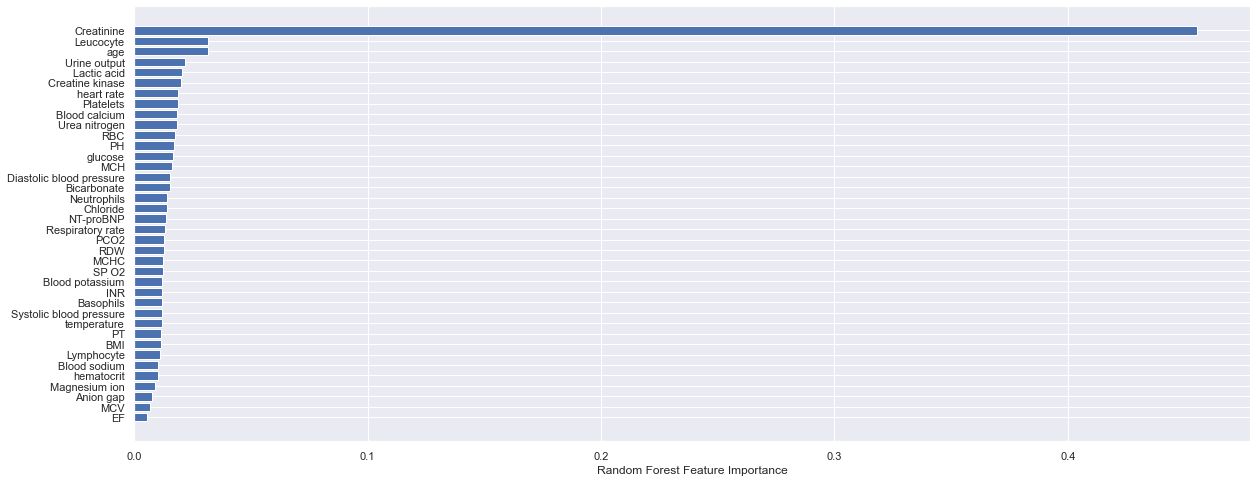

In [21]:
plt.rcParams.update({'figure.figsize': (20.0, 8.0)})
plt.rcParams.update({'font.size': 14})
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_trainRenalup, y_trainRenalup)
rf.feature_importances_
sorted_idx = rf.feature_importances_.argsort()
plt.barh(X_trainRenalup.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

Analysis:
    
    Turns out Creatinine is the most important factor in deciding whether someone got Renal faliure and is follow by variables such as Leucocyte, age, Urine output and Lactic acid